# Air Quality Visualization

### Plot daily average


## 1.Clean the data

In [1]:
library(sqldf)

Loading required package: gsubfn
Loading required package: proto
Loading required package: RSQLite


In [2]:
airq<-read.csv("C:\\Users\\garavig\\Documents\\express_map\\nan_daily.csv")

In [3]:
head(airq)

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10
CU-S0001,2016,12,13,348,29.76084,52.75686,9.076708,18.696931,31.009752
CU-S0001,2016,12,14,349,25.02680,46.91064,5.232055,6.581523,7.178168
CU-S0001,2016,12,15,350,21.84827,67.65511,9.688295,12.462774,13.817642
CU-S0001,2016,12,16,351,20.24135,78.71629,7.682900,9.767872,10.637905
CU-S0001,2016,12,17,352,18.20701,80.02571,1.031734,1.322509,1.462239
CU-S0001,2016,12,18,353,20.75683,75.59185,12.043110,16.343110,18.048031


Create text month

In [4]:
airq$monthf<-factor(airq$m,levels=as.character(1:12),labels=c("Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"),ordered=TRUE)

Create date format column from y m d

In [5]:
airq$date<-as.Date(paste(airq$y,"-",airq$m,"-",airq$d,sep=""))

Find week of year for each day

In [6]:
airq$woy<-as.numeric(format(airq$date,"%W"))

Then for each monthblock we normalize the week to start at 1

In [7]:
library(plyr)

In [8]:
airq<-ddply(airq,.(m),transform,monthweek=1+woy-min(woy))

In [9]:
head(airq)

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,monthf,date,woy,monthweek
CU-S0001,2017,1,1,1,19.89251,73.87243,16.172147,21.976284,24.786167,Jan,2017-01-01,0,1
CU-S0002,2017,1,1,1,26.88037,60.75332,20.988841,29.594086,33.736794,Jan,2017-01-01,0,1
CU-S0002,2017,1,2,2,29.10015,56.65051,12.574908,16.610634,17.751935,Jan,2017-01-02,1,2
CU-S0002,2017,1,3,3,30.03516,54.81269,8.854387,11.420412,12.355431,Jan,2017-01-03,1,2
CU-S0002,2017,1,4,4,28.41016,56.78717,9.699804,12.743864,14.233939,Jan,2017-01-04,1,2
CU-S0002,2017,1,5,5,24.19143,70.63869,3.251032,4.081335,4.309922,Jan,2017-01-05,1,2


Create day of week (dow) column

In [10]:
airq$dow<-as.POSIXlt(airq$date)$wday

In [11]:
head(airq)

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,monthf,date,woy,monthweek,dow
CU-S0001,2017,1,1,1,19.89251,73.87243,16.172147,21.976284,24.786167,Jan,2017-01-01,0,1,0
CU-S0002,2017,1,1,1,26.88037,60.75332,20.988841,29.594086,33.736794,Jan,2017-01-01,0,1,0
CU-S0002,2017,1,2,2,29.10015,56.65051,12.574908,16.610634,17.751935,Jan,2017-01-02,1,2,1
CU-S0002,2017,1,3,3,30.03516,54.81269,8.854387,11.420412,12.355431,Jan,2017-01-03,1,2,2
CU-S0002,2017,1,4,4,28.41016,56.78717,9.699804,12.743864,14.233939,Jan,2017-01-04,1,2,3
CU-S0002,2017,1,5,5,24.19143,70.63869,3.251032,4.081335,4.309922,Jan,2017-01-05,1,2,4


In [12]:
library(ggplot2)

Check dow

In [13]:
min(airq$dow)
max(airq$dow)

[1] 0

[1] 6

Create day of week text (dowf) column. We will use it in the plot. 

In [14]:
airq$dowf<-factor(airq$dow,levels=rev(0:6),labels=rev(c("Sun","Mon","Tue","Wed","Thu","Fri","Sat")),ordered=TRUE)

In [15]:
head(airq)

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,monthf,date,woy,monthweek,dow,dowf
CU-S0001,2017,1,1,1,19.89251,73.87243,16.172147,21.976284,24.786167,Jan,2017-01-01,0,1,0,Sun
CU-S0002,2017,1,1,1,26.88037,60.75332,20.988841,29.594086,33.736794,Jan,2017-01-01,0,1,0,Sun
CU-S0002,2017,1,2,2,29.10015,56.65051,12.574908,16.610634,17.751935,Jan,2017-01-02,1,2,1,Mon
CU-S0002,2017,1,3,3,30.03516,54.81269,8.854387,11.420412,12.355431,Jan,2017-01-03,1,2,2,Tue
CU-S0002,2017,1,4,4,28.41016,56.78717,9.699804,12.743864,14.233939,Jan,2017-01-04,1,2,3,Wed
CU-S0002,2017,1,5,5,24.19143,70.63869,3.251032,4.081335,4.309922,Jan,2017-01-05,1,2,4,Thu


In [16]:
max(airq$monthweek)
min(airq$monthweek)

[1] 6

[1] 1

Monthweek is still wtrong in Jan. Edit it

In [17]:
airq[airq$doy>=1 & airq$doy<=7,14]<-1

Check the result

In [18]:
sqldf('select * from airq where m=1 and id="CU-S0003"')

Loading required package: tcltk
Warning message:
"Quoted identifiers should have class SQL, use DBI::SQL() if the caller performs the quoting."

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,monthf,date,woy,monthweek,dow,dowf
CU-S0003,2017,1,1,1,26.22564,60.78534,24.480435,33.852565,39.112336,Jan,2017-01-01,0,1,0,Sun
CU-S0003,2017,1,2,2,28.98399,60.02772,13.509759,16.990107,18.106070,Jan,2017-01-02,1,1,1,Mon
CU-S0003,2017,1,3,3,29.57416,58.02827,12.765383,16.063203,17.352638,Jan,2017-01-03,1,1,2,Tue
CU-S0003,2017,1,4,4,26.90557,59.84468,12.839933,16.969480,19.186336,Jan,2017-01-04,1,1,3,Wed
CU-S0003,2017,1,5,5,25.17165,66.08777,4.721033,5.617501,5.973642,Jan,2017-01-05,1,1,4,Thu
CU-S0003,2017,1,6,6,25.76541,66.17984,6.090636,7.468087,7.958496,Jan,2017-01-06,1,1,5,Fri
CU-S0003,2017,1,7,7,27.99230,62.01024,7.578818,9.396202,10.071302,Jan,2017-01-07,1,1,6,Sat
CU-S0003,2017,1,8,8,28.72287,54.82860,15.964473,21.070439,23.958855,Jan,2017-01-08,1,2,0,Sun
CU-S0003,2017,1,9,9,28.18391,59.78172,15.814282,20.353070,23.260198,Jan,2017-01-09,2,3,1,Mon
CU-S0003,2017,1,10,10,27.85655,65.87230,20.746444,26.800357,29.558321,Jan,2017-01-10,2,3,2,Tue


## 2. Use ggplot to create heatmap

Check min and max of temperature

In [19]:
min(airq$avgtemp)
max(airq$avgtemp)

[1] 8.633333

[1] 337991756

Convert temp into categorical data by cutting it into chunks.

In [20]:
maxtemp<-max(airq$avgtemp)
airq$tempcat<-cut(airq$avgtemp,c(0,10,20,30,40,max(airq$avgtemp)))

In [21]:
head(airq)

id,y,m,d,doy,avgtemp,avghumid,avgpm1,avgpm25,avgpm10,monthf,date,woy,monthweek,dow,dowf,tempcat
CU-S0001,2017,1,1,1,19.89251,73.87243,16.172147,21.976284,24.786167,Jan,2017-01-01,0,1,0,Sun,"(10,20]"
CU-S0002,2017,1,1,1,26.88037,60.75332,20.988841,29.594086,33.736794,Jan,2017-01-01,0,1,0,Sun,"(20,30]"
CU-S0002,2017,1,2,2,29.10015,56.65051,12.574908,16.610634,17.751935,Jan,2017-01-02,1,1,1,Mon,"(20,30]"
CU-S0002,2017,1,3,3,30.03516,54.81269,8.854387,11.420412,12.355431,Jan,2017-01-03,1,1,2,Tue,"(30,40]"
CU-S0002,2017,1,4,4,28.41016,56.78717,9.699804,12.743864,14.233939,Jan,2017-01-04,1,1,3,Wed,"(20,30]"
CU-S0002,2017,1,5,5,24.19143,70.63869,3.251032,4.081335,4.309922,Jan,2017-01-05,1,1,4,Thu,"(20,30]"


Try plotting

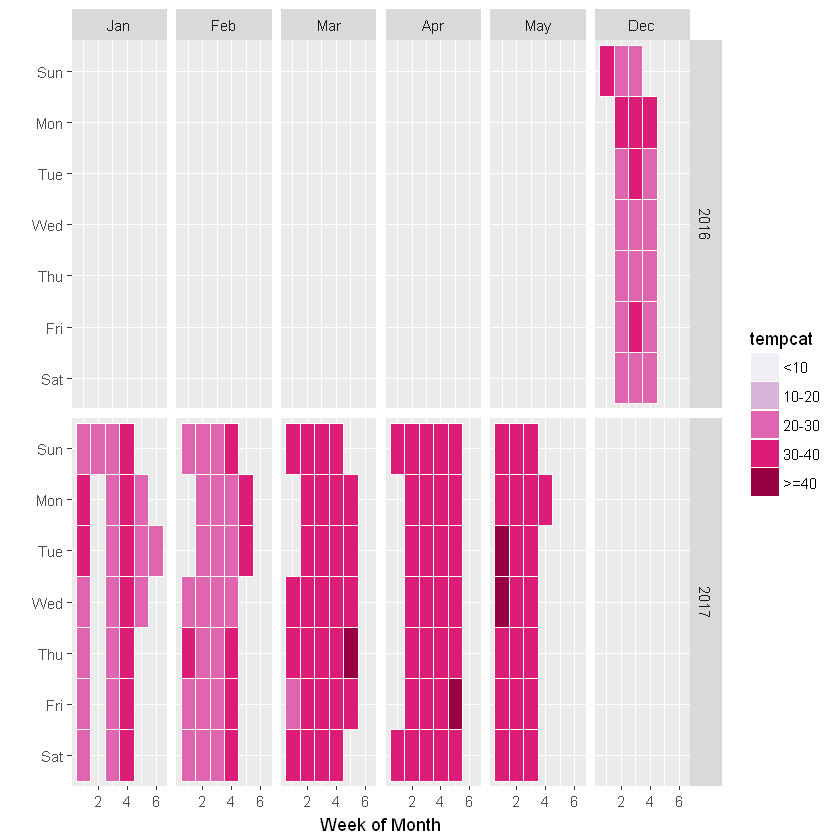

In [22]:
ggplot(airq, aes(monthweek,dowf)) + geom_tile(aes(fill = tempcat),colour = "white") + scale_fill_brewer(palette = "PuRd",labels = c("<10", "10-20", "20-30","30-40",">=40"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

There are temp more than 50 which are impossible. If the data is more than 50, mark it as invalid.

In [23]:
maxtemp<-max(airq$avgtemp)
airq$tempcat<-cut(airq$avgtemp,c(0,10,20,30,40,50,max(airq$avgtemp)))

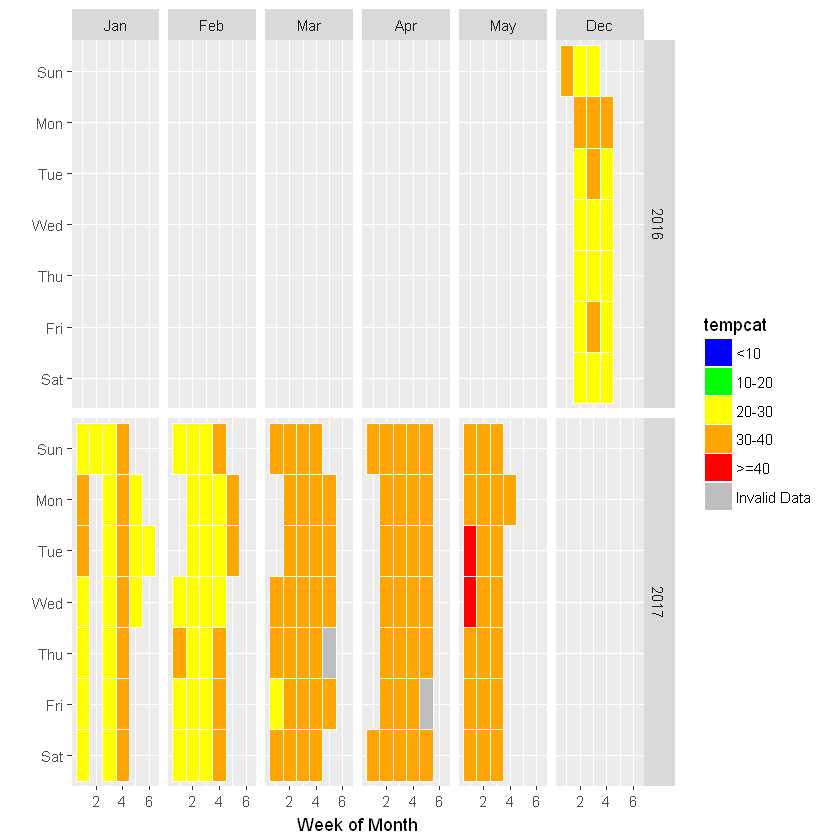

In [24]:
ggplot(airq, aes(monthweek,dowf)) + geom_tile(aes(fill = tempcat),colour = "white") + scale_fill_manual(values=c("blue","green","yellow","orange","red","grey"),labels = c("<10", "10-20", "20-30","30-40",">=40","Invalid Data"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

Something wrong with the color--very high value was assigned to 30-40 degree. Try to average the data manually.

In [25]:
airqdaily<-sqldf('select date,y,monthf,monthweek,dowf,avg(avgtemp) from airq group by y,doy')

In [26]:
head(airqdaily)

date,y,monthf,monthweek,dowf,avg(avgtemp)
2016-12-11,2016,Dec,1,Sun,31.27250
2016-12-12,2016,Dec,2,Mon,30.55400
2016-12-13,2016,Dec,2,Tue,31.56401
2016-12-14,2016,Dec,2,Wed,34.93037
2016-12-15,2016,Dec,2,Thu,25.83115
2016-12-16,2016,Dec,2,Fri,25.67758


In [27]:
colnames(airqdaily)[6]<-"avgtemp"
maxtemp<-max(airqdaily$avgtemp)
airqdaily$tempcat<-cut(airqdaily$avgtemp,c(0,10,20,30,40,50,max(airqdaily$avgtemp)))

Please check the number of classes before assign the color. If the number of color is more than the number of class, false assigning occurred

In [28]:
sqldf('select distinct(tempcat) from airqdaily')

tempcat
"(30,40]"
"(20,30]"
"(50,7.56e+06]"


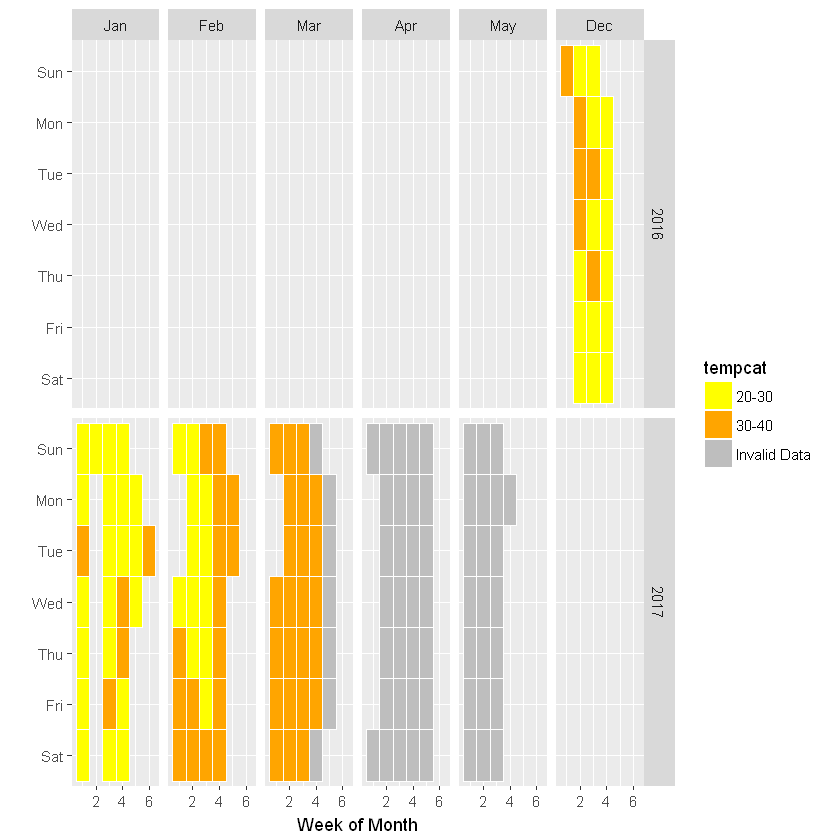

In [29]:
ggplot(airqdaily, aes(monthweek,dowf)) + geom_tile(aes(fill = tempcat),colour = "white") + scale_fill_manual(values=c("yellow","orange","grey"),labels = c("20-30","30-40","Invalid Data"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

Now,visualize humidity

In [30]:
airqdaily<-sqldf('select date,y,monthf,monthweek,dowf,avg(avghumid) from airq group by y,doy')
colnames(airqdaily)[6]<-"avghumid"
maxhumid<-max(airqdaily$avghumid)
airqdaily$humidity<-cut(airqdaily$avghumid,c(0,20,30,50,80,maxhumid))

In [31]:
sqldf('select distinct(humidity) from airqdaily')

humidity
"(30,50]"
"(50,80]"
"(80,8.06e+06]"


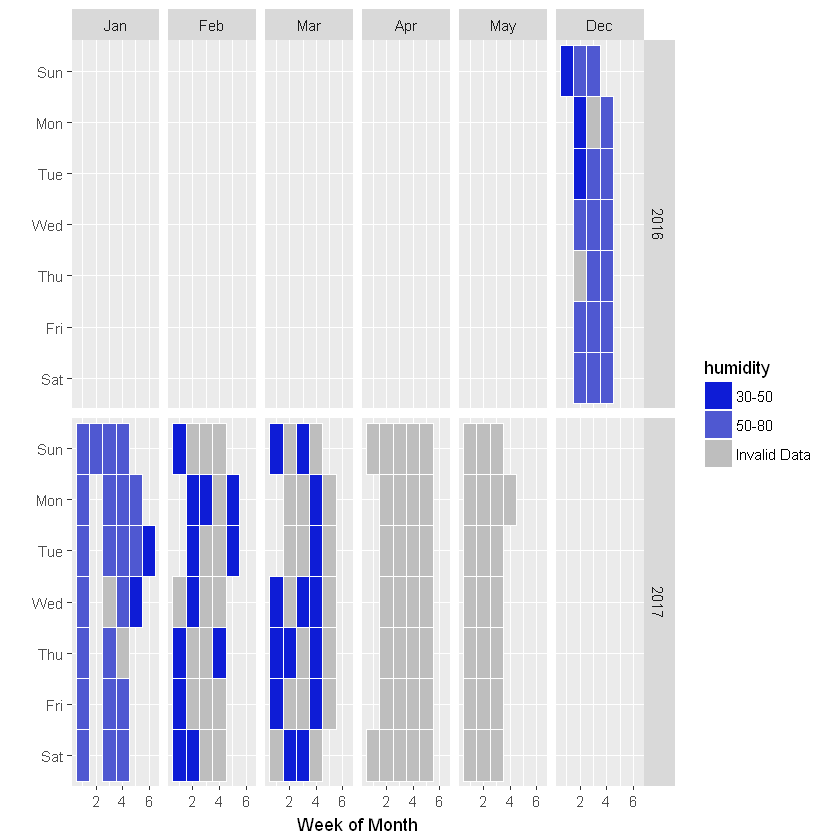

In [32]:
ggplot(airqdaily, aes(monthweek,dowf)) + geom_tile(aes(fill = humidity),colour = "white") + scale_fill_manual(values=c("#0e1cd6","#4f58d1","grey"),labels = c("30-50","50-80","Invalid Data"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

Visualze pm1

In [33]:
airqdaily<-sqldf('select date,y,monthf,monthweek,dowf,avg(avgpm1) from airq group by y,doy')
colnames(airqdaily)[6]<-"avgpm1"
maxpm1<-max(airqdaily$avgpm1)
airqdaily$pm1<-cut(airqdaily$avgpm1,c(0,50,120,200,300,maxpm1))

In [34]:
sqldf('select distinct(pm1) from airqdaily')

pm1
"(0,50]"
"(50,78.2]"


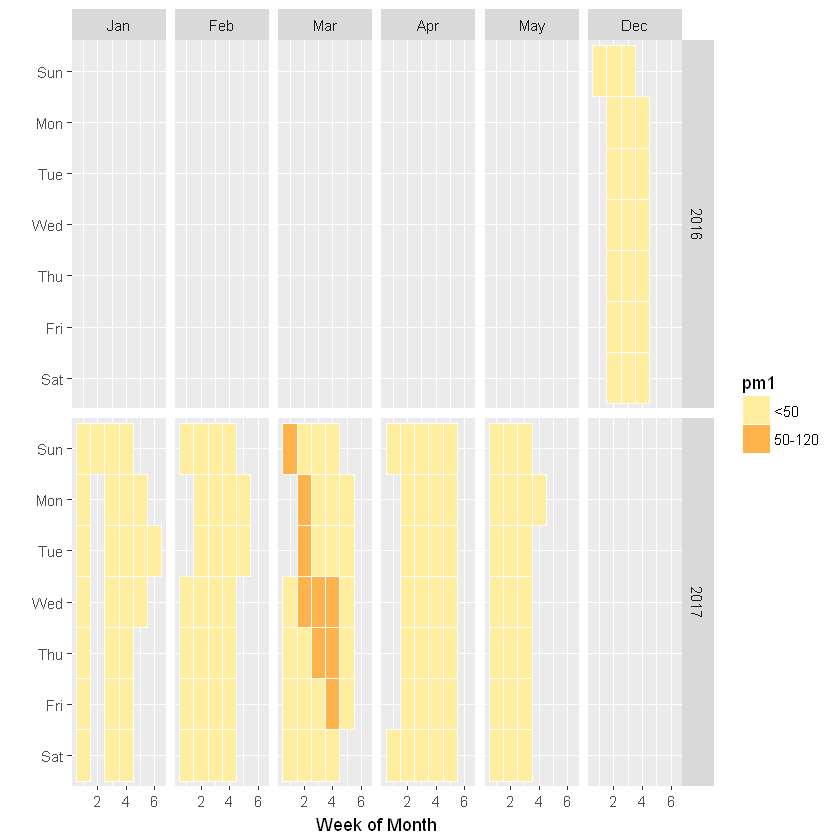

In [35]:
ggplot(airqdaily, aes(monthweek,dowf)) + geom_tile(aes(fill = pm1),colour = "white") + scale_fill_manual(values=c("#ffeda0","#feb24c"),labels = c("<50","50-120"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

visualize pm2.5

In [36]:
airqdaily<-sqldf('select date,y,monthf,monthweek,dowf,avg(avgpm25) from airq group by y,doy')
colnames(airqdaily)[6]<-"avgpm25"
maxpm25<-max(airqdaily$avgpm25)
airqdaily$pm25<-cut(airqdaily$avgpm25,c(0,50,120,200,300,maxpm25))

In [37]:
sqldf('select distinct(pm25) from airqdaily')

pm25
"(0,50]"
"(120,124]"
"(50,120]"


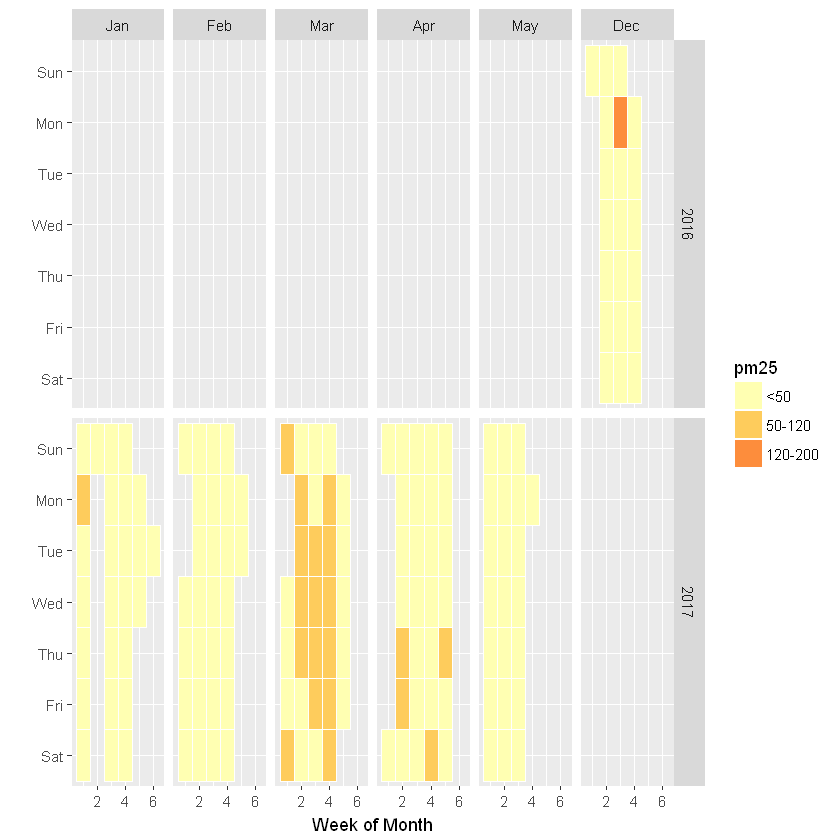

In [38]:
ggplot(airqdaily, aes(monthweek,dowf)) + geom_tile(aes(fill = pm25),colour = "white") + scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c"),labels = c("<50","50-120","120-200"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

visualize pm10

In [39]:
airqdaily<-sqldf('select date,y,monthf,monthweek,dowf,avg(avgpm10) from airq group by y,doy')
colnames(airqdaily)[6]<-"avgpm10"
maxpm10<-max(airqdaily$avgpm10)
airqdaily$pm10<-cut(airqdaily$avgpm10,c(0,50,120,200,300,maxpm10))

In [40]:
sqldf('select distinct(pm10) from airqdaily')

pm10
"(0,50]"
"(200,245]"
"(120,200]"
"(50,120]"


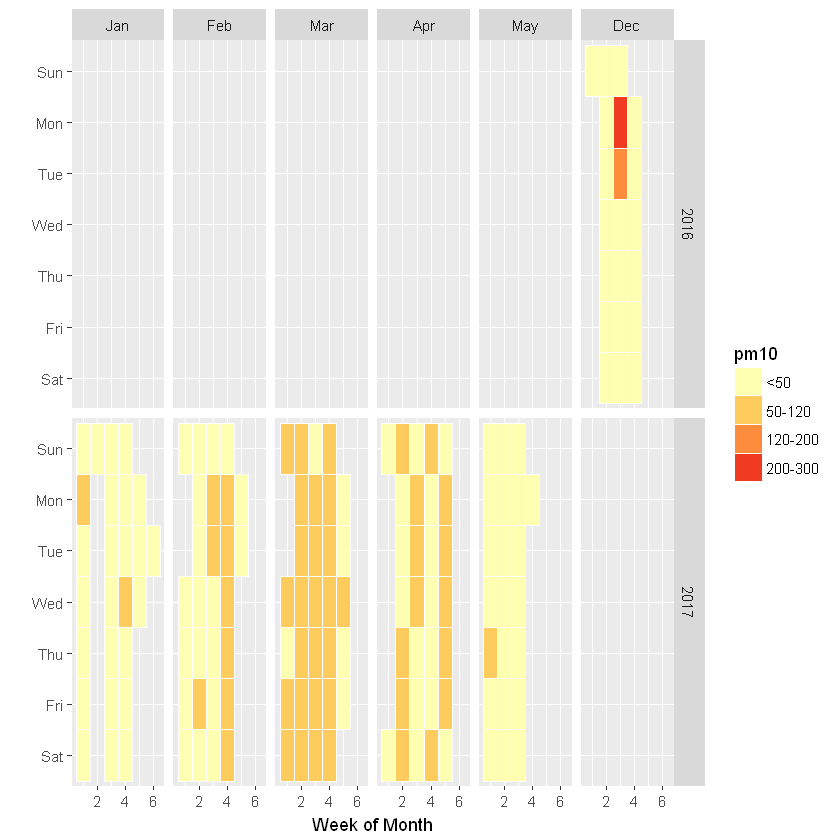

In [41]:
ggplot(airqdaily, aes(monthweek,dowf)) + geom_tile(aes(fill = pm10),colour = "white") + scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20"),labels = c("<50","50-120","120-200","200-300"))+ facet_grid(y~monthf) + xlab("Week of Month") + ylab("")

In [42]:
airq$pm1cat<-cut(airq$avgpm1,c(0,50,120,200,300),include.lowest=TRUE)
sqldf('select distinct(pm1cat) from airq')

pm1cat
"[0,50]"
"(200,300]"
"(120,200]"
"(50,120]"


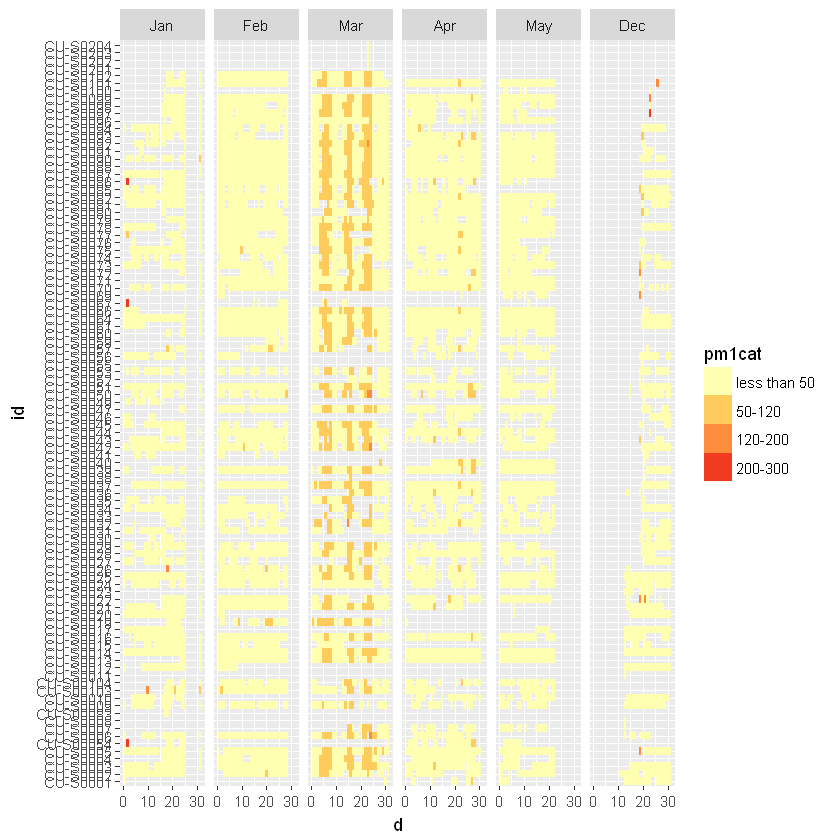

In [43]:
ggplot(airq, aes(d,id)) +geom_tile(aes(fill = pm1cat))+facet_grid(.~ monthf)+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))

In [44]:
subairq<-sqldf('select * from airq where m=3')

Plot only March data

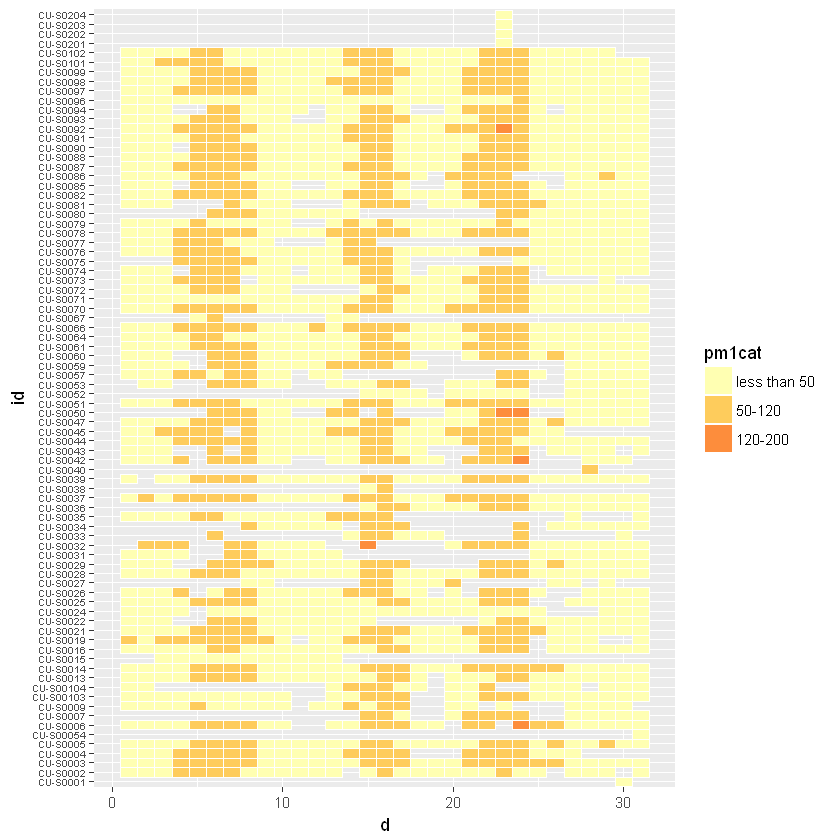

In [45]:
ggplot(subairq, aes(d,id)) +geom_tile(aes(fill = pm1cat),colour="white")+theme (axis.text.y = element_text(size=6))+ scale_fill_manual(values=c("#ffffb2","#fecc5c","#fd8d3c","#f03b20","#bd0026"),labels = c("less than 50","50-120","120-200","200-300","more than 300"))

In [47]:
min(airq$avgpm1)
max(airq$avgpm1)
min(airq$avgpm25)
max(airq$avgpm25)
min(airq$avgpm10)
max(airq$avgpm10)

[1] 0

[1] 293.67

[1] 0

[1] 1161.3

[1] 0

[1] 3110.78

Choose some tambol in the middle of Nan to plot violin

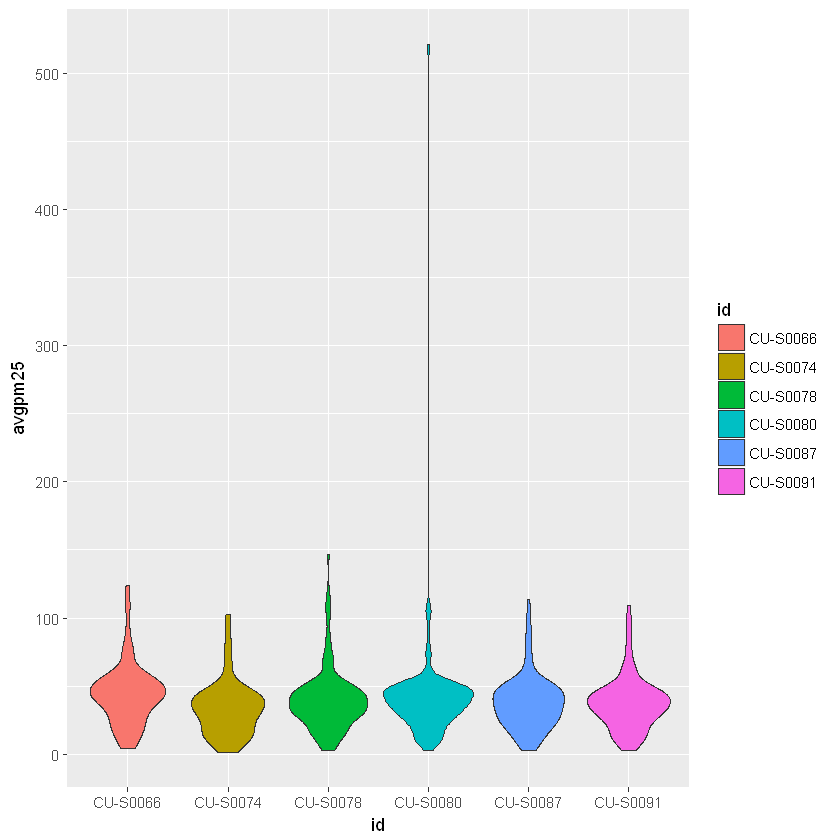

In [57]:
airqsub<-sqldf('select * from airq where id="CU-S0074" or id="CU-S0066" or id="CU-S0091" or id="CU-S0087" or id="CU-S0080" or id="CU-S0078"')
p <- ggplot(airqsub, aes(id,avgpm25))
p + geom_violin(aes(fill=id))